Calculating Energy Efficiency for an IRS-Assisted Wireless Network.
1. Using a 3D environment to model Base Station, IRS and Users.
2. Implementing on a 2 User system.
3. Starting with a Double-IRS Assisted Network, comparing energy efficiency for both Ideal and Practical Models.
4. Shifting to a Single IRS Assisted Network and comparing energy efficiency for both Ideal and Practical Models.
5. We have performed the comparison keeping in mind all three quantization bits, and considering element sharing to be true for all scenarios. 

In [1]:
# Importing all libraries

import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from Functions import *

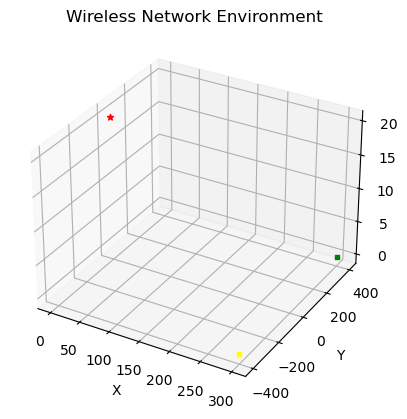

In [2]:
#============== System parameters
'''
Nt = Number of transmit antennas (SISO = 1)
K = Number of Users
BW = Bandwidth
NF = Noise Floor
ALPHA = PLE for direct link
BETA = PLE for indirect link
wn = efficiency of transmit power amplifier

'''
Nt = 1
K = 2
# gamma = db2pow(20)
f = 2.4e9
c = 3e8
Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda
BW = 20e6
NF = 10
noise = -133 # -174+10*np.log10(BW) + NF

GRID_RADIUS = 1000
BASE_STATION_POSITION = (0, 0, 20)
TRANSMIT_POWER_WATTS = 0.1 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
# FADING_STD_DEV = 3
ALPHA = 2.2 #path loss exponent (direct)
BETA = 3.8 #path loss exponent (indirect)
ZETA = 3.8
m = 1
omega = np.sqrt(0.5)

IRS_POSITION_1 = (300, 400, 10)
IRS_POSITION_2 = (300, -400, 10)

# Power consumption params
wn = 0.5
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
Pb = 10 # in dBw
Pu = 10 # 10 in dBm
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
# Pb = 10 # in dBw
# Pu = 10 # in dBm

# Generate user positions
USER_POSITION = (50,5,0)
user_positions = generate_user_positions_3D(K, GRID_RADIUS)
loc_U = user_positions
print('User positions:'"\n")
print(loc_U)

# # Generate user positions
# user_positions = generate_user_positions_2D(K, GRID_RADIUS)
# print('User positions:'"\n", user_positions)
# print()
# loc_U = user_positions

# Generate antennas position
AP_position = generate_station_positions_3D(BASE_STATION_POSITION)
xt, yt, zt = AP_position[0]

# Generate IRS position_1
irs_position_1 = generate_IRS_3D(IRS_POSITION_1)
xs_1, ys_1, zs_1 = irs_position_1[0]

# Generate IRS position_2
irs_position_2 = generate_IRS_3D(IRS_POSITION_2)
xs_2, ys_2, zs_2 = irs_position_2[0]

tx_ant_coords = generate_transmit_antenna_coordinates_3D(Nt, xt, yt, zt, halfLambda, quarterLambda)
loc_T = tx_ant_coords
# print('Transmit antenna(e) coordinates:'"\n", loc_T) 
# print()

# irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
# loc_S_1 = irs_coords_1
# # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
# # print()

# irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
# loc_S_2 = irs_coords_2
# # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
# # print()

# dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
# dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

# # Reshapiing the distance from antennas/BS to user
# dTU = dTU.reshape(Nt,K)
# # Compute row-wise averages
# dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
# dSU_1 = dSU_1.reshape(1,K)
# # Compute the sum of elements in each row
# dTS_1 = np.mean(dTS_1, axis=1)
# # Compute the average of row sums
# dTS_1 = np.mean(dTS_1)
# # Compute row-wise averages
# dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
# dSU_2 = dSU_2.reshape(1,K)
# # Compute the sum of elements in each row
# dTS_2 = np.mean(dTS_2, axis=1)
# # Compute the average of row sums
# dTS_2 = np.mean(dTS_2)

# Plot the 3D grid, base station, IRS, and user positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
plt.scatter(IRS_POSITION_1[0], IRS_POSITION_1[1], IRS_POSITION_1[2], color='green', marker='s', label='IRS_1')
plt.scatter(IRS_POSITION_2[0], IRS_POSITION_2[1], IRS_POSITION_2[2],color='yellow', marker='s', label='IRS_2')
ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireless Network Environment')
# ax.legend()
ax.grid(True)

# # Draw the circle in the x-y plane
# circle = plt.Circle((xt, yt), (GRID_RADIUS), edgecolor='black', facecolor='none')
# ax.add_patch(circle)
# art3d.pathpatch_2d_to_3d(circle, z=0, zdir='z')  # Add the circle to the x-y plane at z=zt
# plt.show()

In [132]:
h_dk_3d = []
h_rk_3d = []
h_rk_transpose_3d = []
G_3d = []
h_dk_2_3d = []  
h_rk_2_3d = [] 
h_rk_transpose_2_3d = []  
G_2_3d = []  

NUM_SIMULATIONS = 100
Ns_max = 100

# Perform simulations
for i in range(NUM_SIMULATIONS):

    # Generate the Rayleigh Fading Channel for each user (h_dk)
    h_dk1 = []
    fading1 = []
    for user in range(K):
        fading1.append(generate_rayleigh_fading_channel(Nt, FADING_STD_MEAN, FADING_STD_DEV))
    h_dk1 = np.array(fading1)
    h_dk1 = h_dk1.reshape(Nt,K)
    h_dk_3d.append(h_dk1)
    
    # Generate the Nakagami Channel from each user to the IRS (h_rk)
    h_rk1 = []
    fading2 = []
    for user in range(K):
        fading2.append(generate_nakagami_samples(m, omega, Ns_max))
    h_rk1 = np.array(fading2)
    h_rk1 = h_rk1.reshape(Ns_max,K)
    h_rk_3d.append(h_rk1)
    
    h_rk_conj1 = np.conj(h_rk1)
    h_rk_transpose1 = np.transpose(h_rk_conj1)
    h_rk_transpose_3d.append(h_rk_transpose1)
    
    # Generate the Nakagami Channel from base_station to the IRS (G)
    G1 = []
    fading3 = []
    for element in range(Ns_max):
        fading3.append(generate_nakagami_samples(m, omega, Nt))
    G1 = np.array(fading3)
    G_3d.append(G1)

    # # Generate the Rayleigh Fading Channel for each user (h_dk)
    # h_dk2 = []
    # fading4 = []
    # for user in range(K):
    #     fading4.append(generate_rayleigh_fading_channel(Nt, FADING_STD_MEAN, FADING_STD_DEV))
    # h_dk2 = np.array(fading4)
    # h_dk2 = h_dk2.reshape(Nt, K)
    # h_dk_2_3d.append(h_dk2)

    # Generate the Nakagami Channel from each user to the IRS (h_rk)
    h_rk2 = []
    fading5 = []
    for user in range(K):
        fading5.append(generate_nakagami_samples(m, omega, Ns_max))
    h_rk2 = np.array(fading5)
    h_rk2 = h_rk2.reshape(Ns_max, K)
    h_rk_2_3d.append(h_rk2)

    h_rk_conj2 = np.conj(h_rk2)
    h_rk_transpose2 = np.transpose(h_rk_conj2)
    h_rk_transpose_2_3d.append(h_rk_transpose2)

    # Generate the Nakagami Channel from base_station to the IRS (G)
    G2 = []
    fading6 = []
    for element in range(Ns_max):
        fading6.append(generate_nakagami_samples(m, omega, Nt))
    G2 = np.array(fading6)
    G_2_3d.append(G2)

In [133]:
qB = np.arange(2,4,1)
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
print(N_values)

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for B in qB:
    
    # Create a set of quantized theta values
    # quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
        irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_2 = irs_coords_2
        # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        # Compute row-wise averages
        dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
        dSU_2 = dSU_2.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_2 = np.mean(dTS_2, axis=1)
        # Compute the average of row sums
        dTS_2 = np.mean(dTS_2)

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        h_rk_2_ns_values = [h_rk_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        G_ns_2_values = [G_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            h_rk_2 = h_rk_2_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose_2 = np.transpose(np.conj(h_rk_2))  # Shape: (K, Ns)
            G_2 = G_ns_2_values[s]  # Shape: (Ns, 1)
            
            results_array_1 = results_array_sharing_ideal(K, Ns, Nt, h_rk, h_rk_transpose, G, B)
            results_array_2 = results_array_sharing_ideal(K, Ns, Nt, h_rk_2 ,h_rk_transpose_2, G_2, B)
        
            # print(results_array_1)
            # print()
            # print(results_array_2)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array_1[0][i])/(np.sqrt((dSU_1[0][i])**ALPHA * (dTS_1)**ALPHA))) + ((results_array_2[0][i])/(np.sqrt((dSU_2[0][i])**BETA * (dTS_2)**BETA))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_21 = compute_power_consumption_at_ris(B, Ns)
            power_22 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_21 + power_22 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[B] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[B] = average_energy_efficiency_1

print('done')
print(N_values)

[  1   4   9  16  25  36  49  64  81 100]


C:\Users\NR\AppData\Local\Temp\ipykernel_19120\1190308728.py:94: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100]


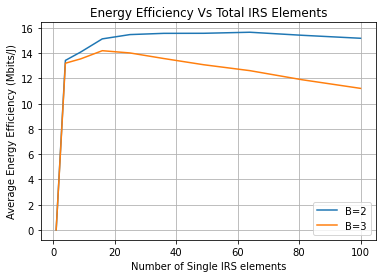

In [134]:
# Plot the graph for each value of N
for B, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'B={B}')

plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Number of Single IRS elements')
plt.title('Energy Efficiency Vs Total IRS Elements')
plt.legend()
plt.grid(True)
plt.show()

# # Plot the graph for each value of N
# for B, sum_rates_1 in results_dict_1.items():
#     plt.plot(N_values, sum_rates_1, label=f'B={B}')

# new_x_limits = (40, 100)
# new_y_limits = (1.95e9, 2.05e9)
# plt.xlim(new_x_limits)
# plt.ylim(new_y_limits)

# plt.ylabel('Sum rate (bps)')
# plt.xlabel('Number of IRS elements')
# plt.title('Sum Rates Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

In [135]:
beta_min = 0.2
k = 1.6
phi = 0.43 * np.pi
qB = np.arange(2,4,1)
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
print(N_values)

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for B in qB:
    
    # Create a set of quantized theta values
    # quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
        irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_2 = irs_coords_2
        # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        # Compute row-wise averages
        dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
        dSU_2 = dSU_2.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_2 = np.mean(dTS_2, axis=1)
        # Compute the average of row sums
        dTS_2 = np.mean(dTS_2)

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        h_rk_2_ns_values = [h_rk_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)
        G_ns_2_values = [G_2_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)

            h_rk_2 = h_rk_2_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose_2 = np.transpose(np.conj(h_rk_2))  # Shape: (K, Ns)
            G_2 = G_ns_2_values[s]  # Shape: (Ns, 1)
            
            results_array_1 = results_array_sharing_practical(K, Ns, Nt, h_rk, h_rk_transpose, G, B, beta_min, phi, k)
            results_array_2 = results_array_sharing_practical(K, Ns, Nt, h_rk_2, h_rk_transpose_2, G_2, B, beta_min, phi, k)
        
            # print(results_array_1)
            # print()
            # print(results_array_2)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array_1[0][i])/(np.sqrt((dSU_1[0][i])**ALPHA * (dTS_1)**ALPHA))) + ((results_array_2[0][i])/(np.sqrt((dSU_2[0][i])**BETA * (dTS_2)**BETA))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_21 = compute_power_consumption_at_ris(B, Ns)
            power_22 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_21 + power_22 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[B] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[B] = average_energy_efficiency_1

print('done')
print(N_values)

[  1   4   9  16  25  36  49  64  81 100]


C:\Users\NR\AppData\Local\Temp\ipykernel_19120\935345096.py:97: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100]


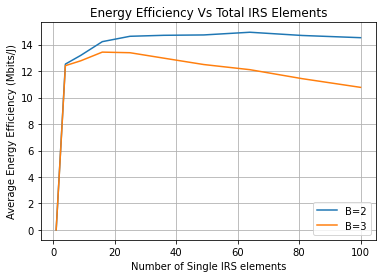

In [136]:
# Plot the graph for each value of N
for B, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'B={B}')

plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Number of Single IRS elements')
plt.title('Energy Efficiency Vs Total IRS Elements')
plt.legend()
plt.grid(True)
plt.show()

# # Plot the graph for each value of N
# for B, sum_rates_1 in results_dict_1.items():
#     plt.plot(N_values, sum_rates_1, label=f'B={B}')

# plt.ylabel('Sum rate')
# plt.xlabel('Number of IRS elements')
# plt.title('Sum Rates Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

# SINGLE IRS CASE

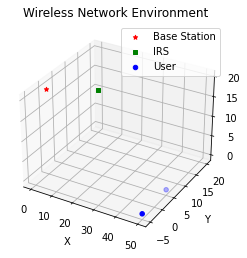

In [137]:
# Plot the 3D grid, base station, IRS, and user positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
ax.scatter(IRS_POSITION_1[0], IRS_POSITION_1[1], IRS_POSITION_1[2], color='green', marker='s', label='IRS')
ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireless Network Environment')
ax.legend()
ax.grid(True)

# # Draw the circle in the x-y plane
# circle = plt.Circle((xt, yt), (GRID_RADIUS), edgecolor='black', facecolor='none')
# ax.add_patch(circle)
# art3d.pathpatch_2d_to_3d(circle, z=0, zdir='z')  # Add the circle to the x-y plane at z=zt
# plt.show()

In [139]:
qB = np.arange(2,4,1)
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
print(N_values)

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for B in qB:
    
    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)
        
        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate = []
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)
            
            results_array = results_array_sharing_ideal(K, Ns, Nt, h_rk, h_rk_transpose, G, B)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU_1[0][i])**ALPHA * (dTS_1)**ALPHA))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            # print(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_2 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_2 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[B] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[B] = average_energy_efficiency_1

print('done')
print(N_values)

[  1   4   9  16  25  36  49  64  81 100]


C:\Users\NR\AppData\Local\Temp\ipykernel_19120\1270167218.py:66: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100]


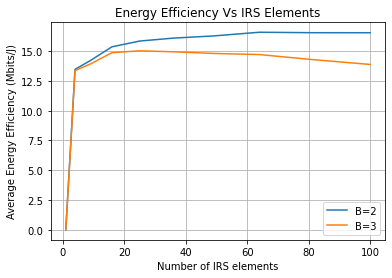

In [140]:
# Plot the graph for each value of N
for B, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'B={B}')

plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Number of IRS elements')
plt.title('Energy Efficiency Vs IRS Elements')
plt.legend()
plt.grid(True)
plt.show()

# # Plot the graph for each value of N
# for B, sum_rates_1 in results_dict_1.items():
#     plt.plot(N_values, sum_rates_1, label=f'B={B}')

# plt.ylabel('Sum rate (kbps)')
# plt.xlabel('Number of IRS elements')
# plt.title('Sum Rates Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()

In [141]:
qB = np.arange(2,4,1)
Ns_max_sqrt = int(np.sqrt(Ns_max))
N_values = np.array([i**2 for i in range(1, Ns_max_sqrt + 1)])
print(N_values)

# Initialize an empty dictionary to store the results
results_dict_1 = {}
results_dict_2 = {}

for B in qB:
    
    # Create a set of quantized theta values
    # quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)
    # print('Quantized_theta_set: ',"\n", (quantized_theta_set))
    
    average_energy_efficiency_1 = []
    sum_rates_1 = []

    for Ns in N_values:
        nIRSrow = int(np.sqrt(Ns))
        nIRScol = nIRSrow

        irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
        loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
        dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
        
        # Reshapiing the distance from antennas/BS to user
        dTU = dTU.reshape(Nt,K)
        # Compute row-wise averages
        dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
        dSU_1 = dSU_1.reshape(1,K)
        # Compute the sum of elements in each row
        dTS_1 = np.mean(dTS_1, axis=1)
        # Compute the average of row sums
        dTS_1 = np.mean(dTS_1)

        # Extract channel values for the current Ns value
        h_rk_ns_values = [h_rk_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, K)
        G_ns_values = [G_3d[s][:Ns, :] for s in range(NUM_SIMULATIONS)]  # Shape: (NUM_SIMULATIONS, Ns, 1)

        # Initialize list to store individual outage probabilities
        energy_efficiency = []
        
        # Initialize sum-rates for this case
        sum_rate_N = 0  
    
        # Perform simulations
        for s in range(NUM_SIMULATIONS):
            h_dk = h_dk_3d[s]  # Shape: (1, K)
            h_rk = h_rk_ns_values[s]  # Shape: (Ns, K)
            h_rk_transpose = np.transpose(np.conj(h_rk))  # Shape: (K, Ns)
            G = G_ns_values[s]  # Shape: (Ns, 1)
            
            results_array = results_array_sharing_practical(K, Ns, Nt, h_rk, h_rk_transpose, G, B, beta_min, phi, k)
            
            link_inter = []
            
            for i in range(K):
                link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_dk[0][i]*0)/(np.sqrt((dTU[0][i])**ZETA))) + ((results_array[0][i])/(np.sqrt((dSU_1[0][i])**ALPHA * (dTS_1)**ALPHA))))
                link_inter.append(link_inter_value)  # Append the computed value to the list
            
            # Convert the list to a numpy array
            link_inter = np.array(np.abs(link_inter))
            link_inter_array = link_inter.reshape(1,K)
            
            # Calculate link_budget using the updated link_inter array
            link_budget = 10 * np.log10((link_inter_array)**2) + 30 
            link_budget = link_budget.reshape(1,K)
            # print(link_budget)
            
            #Calculate the noise value
            # noise = -133 # in dBm
            
            SNR_matrix = []
            
            # Calculate SNR
            for i in range(K):
                SNR = compute_SNR(link_budget[0][i], noise)
                SNR_matrix.append(SNR)
            
            SNR_matrix = np.array(SNR_matrix)
            SNR_matrix = SNR_matrix.reshape(1,K)
            
            # Calculate rate 
            rate_matrix = BW * compute_rate((SNR_matrix))
            rate_matrix_new = rate_matrix.flatten()
            sum_rate_N = np.sum(rate_matrix_new)
            sum_rate.append(sum_rate_N)
            # print(sum_rate_N)
            
            power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
            power_2 = compute_power_consumption_at_ris(B, Ns)
            power_3 = (10**(Pu/10))/1000
            power_3 = power_3 * K
            P = power_1 + power_2 + power_3

            # Compute the energy_efficiency
            ee = compute_energy_efficiency(sum_rate_N, P)
            energy_efficiency.append(ee/10e6)
    
        # Compute average energy efficiency for the current N
        average_energy_efficiencies_1 = compute_average_energy_efficiency(energy_efficiency)
        average_energy_efficiency_1.append(average_energy_efficiencies_1)
        
        # Append sum-rate for this T to the list
        sum_rates_1.append((np.sum(sum_rate)/NUM_SIMULATIONS))
        
    # Store the results in the dictionary with N as the key
    results_dict_1[B] = sum_rates_1
    
    # Store the results in the dictionary with N as the key
    results_dict_2[B] = average_energy_efficiency_1

print('done')
print(N_values)

[  1   4   9  16  25  36  49  64  81 100]


C:\Users\NR\AppData\Local\Temp\ipykernel_19120\2851342865.py:70: RuntimeWarning: divide by zero encountered in log10
  link_budget = 10 * np.log10((link_inter_array)**2) + 30


done
[  1   4   9  16  25  36  49  64  81 100]


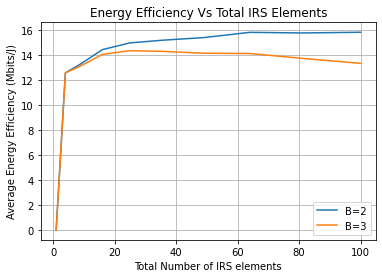

In [142]:
# Plot the graph for each value of N
for B, average_energy_efficiency_1 in results_dict_2.items():
    plt.plot(N_values, average_energy_efficiency_1, label=f'B={B}')

plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Total Number of IRS elements')
plt.title('Energy Efficiency Vs Total IRS Elements')
plt.legend()
plt.grid(True)
plt.show()

# # Plot the graph for each value of N
# for B, sum_rates_1 in results_dict_1.items():
#     plt.plot(N_values, sum_rates_1, label=f'B={B}')

# plt.ylabel('Sum rate')
# plt.xlabel('Number of IRS elements')
# plt.title('Sum Rates Vs IRS Elements')
# plt.legend()
# plt.grid(True)
# plt.show()